# Learning Scikit-learn: Machine Learning in Python

## IPython Notebook for Chapter 4: Advanced Features  - Feature Engineering and Selection

_The usual scenario for learning tasks such as those presented in this book include a list of instances (represented as feature/value pairs) and a special feature (the target class) that we want to predict for future instances based on the values of the remaining features. However, the source data does not usually come in this format. We have to extract what we think are potentially useful features and convert them to our learning format. This process is called feature extraction or feature engineering, and it is an often underestimated but very important and time-consuming phase in most real- world machine learning tasks._

Start by importing numpy, scikit-learn, pandas, and pyplot, the Python libraries we will be using in this chapter. Show the versions we will be using (in case you have problems running the notebooks).

In [94]:
%pylab inline
import IPython
import sklearn as sk
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

print('IPython version:', IPython.__version__)
print('numpy version:', np.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)
print('pandas version:', pd.__version__)

Populating the interactive namespace from numpy and matplotlib
IPython version: 6.1.0
numpy version: 1.13.1
scikit-learn version: 0.18.2
matplotlib version: 2.0.2
pandas version: 0.20.3


c:\venvs\scikit-learn-book\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Import titanic data using pandas

The Python package pandas (http://pandas.pydata.org/), for example, provides data structures and tools for data analysis. It aims to provide similar features to those of R, the popular language and environment for statistical computing. We will use pandas to import the Titanic data we presented in Chapter 2, Supervised Learning, and convert them to the scikit-learn format.

In [95]:
titanic_raw = pd.read_csv('data/titanic.csv')
print (titanic_raw)

      row.names pclass  survived  \
0             1    1st         1   
1             2    1st         0   
2             3    1st         0   
3             4    1st         0   
4             5    1st         1   
5             6    1st         1   
6             7    1st         1   
7             8    1st         0   
8             9    1st         1   
9            10    1st         0   
10           11    1st         0   
11           12    1st         1   
12           13    1st         1   
13           14    1st         1   
14           15    1st         0   
15           16    1st         1   
16           17    1st         0   
17           18    1st         0   
18           19    1st         1   
19           20    1st         1   
20           21    1st         1   
21           22    1st         0   
22           23    1st         1   
23           24    1st         1   
24           25    1st         1   
25           26    1st         0   
26           27    1st      

You can see that each csv column has a corresponding feature into the DataFrame, and that the feature type is induced from the available data. We can inspect some features to see what they look like.

In [96]:
print (titanic_raw.head()[['pclass', 'survived', 'age', 'embarked', 'boat', 'sex']]) #<-rjm49 note mix of indexing and list notation [[]]


  pclass  survived      age     embarked   boat     sex
0    1st         1  29.0000  Southampton      2  female
1    1st         0   2.0000  Southampton    NaN  female
2    1st         0  30.0000  Southampton  (135)    male
3    1st         0  25.0000  Southampton    NaN  female
4    1st         1   0.9167  Southampton     11    male


In [51]:
titanic_raw.describe() #rjm49 - handy Pandas summarisation method

,row.names,survived,age
count,1313.000000,1313.000000,633.000000
mean,657.000000,0.341965,31.194181
std,379.174762,0.474549,14.747525
min,1.000000,0.000000,0.166700
25%,329.000000,0.000000,21.000000
50%,657.000000,0.000000,30.000000
75%,985.000000,1.000000,41.000000
max,1313.000000,1.000000,71.000000


## Feature extraction

he main difficulty we have now is that scikit-learn methods expect real numbers
as feature values. In Chapter 2, Supervised Learning, we used the LabelEncoder and OneHotEncoder preprocessing methods to manually convert certain categorical features into 1-of-K values (generating a new feature for each possible value; valued 1 if the original feature had the corresponding value and 0 otherwise). This time, we will use a similar scikit-learn method, DictVectorizer, which automatically builds these features from the different original feature values. Moreover, we will program a method to encode a set of columns in a unique step. 

In [97]:
from sklearn import feature_extraction

def one_hot_dataframe(data, cols, replace=False):
    """ Takes a dataframe and a list of columns that need to be encoded.
    Returns a 3-tuple comprising the data, the vectorized data,
    and the fitted vectorizor.
    Modified from https://gist.github.com/kljensen/5452382
    """
    dic_vecr = feature_extraction.DictVectorizer()
    stuff_to_transform = data[cols]
    print(stuff_to_transform.head())
    dty_list = stuff_to_transform.to_dict(orient='records') #rjm49 - this call makes a dict for each record in the table, returns them all as a list
    print("first dict:", dty_list[0]) #rjm49 - look at the first one to see what's in it...
    
    txd = dic_vecr.fit_transform(dty_list) #converts string types to 1-hot-encoded classes as a NumPy "sparse array"
    print("first transformed vec:\n", txd[0])

    vecData = pd.DataFrame( txd.toarray())
    vecData.columns = dic_vecr.get_feature_names()
    vecData.index = data.index
    if replace is True: #replace the columns in data with those from our VecData object
        data = data.drop(cols, axis=1)
        data = data.join(vecData)
    return (data, vecData)

titanic, titanic_n= one_hot_dataframe(titanic_raw, ['pclass', 'embarked', 'sex'], replace=True)
print(titanic.head())

  pclass     embarked     sex
0    1st  Southampton  female
1    1st  Southampton  female
2    1st  Southampton    male
3    1st  Southampton  female
4    1st  Southampton    male
first dict: {'pclass': '1st', 'embarked': 'Southampton', 'sex': 'female'}
first transformed vec:
   (0, 3)	1.0
  (0, 4)	1.0
  (0, 7)	1.0
   row.names  survived                                             name  \
0          1         1                     Allen, Miss Elisabeth Walton   
1          2         0                      Allison, Miss Helen Loraine   
2          3         0              Allison, Mr Hudson Joshua Creighton   
3          4         0  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)   
4          5         1                    Allison, Master Hudson Trevor   

       age                        home.dest room      ticket   boat  embarked  \
0  29.0000                     St Louis, MO  B-5  24160 L221      2       0.0   
1   2.0000  Montreal, PQ / Chesterville, ON  C26         NaN    NaN   

In [53]:
titanic.describe()

,row.names,survived,age,embarked,embarked=Cherbourg,embarked=Queenstown,embarked=Southampton,pclass=1st,pclass=2nd,pclass=3rd,sex=female,sex=male
count,1313.000000,1313.000000,633.000000,821.0,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,657.000000,0.341965,31.194181,0.0,0.154608,0.034273,0.436405,0.245240,0.213252,0.541508,0.352628,0.647372
std,379.174762,0.474549,14.747525,0.0,0.361668,0.181998,0.496128,0.430393,0.409760,0.498464,0.477970,0.477970
min,1.000000,0.000000,0.166700,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,329.000000,0.000000,21.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,657.000000,0.000000,30.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,985.000000,1.000000,41.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1313.000000,1.000000,71.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


What does the 'embarked' feature has?

In [54]:
print (titanic_n.head(5))
print (titanic_n[titanic_n['embarked'] != 0].head())

   embarked  embarked=Cherbourg  embarked=Queenstown  embarked=Southampton  \
0       0.0                 0.0                  0.0                   1.0   
1       0.0                 0.0                  0.0                   1.0   
2       0.0                 0.0                  0.0                   1.0   
3       0.0                 0.0                  0.0                   1.0   
4       0.0                 0.0                  0.0                   1.0   

   pclass=1st  pclass=2nd  pclass=3rd  sex=female  sex=male  
0         1.0         0.0         0.0         1.0       0.0  
1         1.0         0.0         0.0         1.0       0.0  
2         1.0         0.0         0.0         0.0       1.0  
3         1.0         0.0         0.0         1.0       0.0  
4         1.0         0.0         0.0         0.0       1.0  
     embarked  embarked=Cherbourg  embarked=Queenstown  embarked=Southampton  \
62        NaN                 0.0                  0.0                   0.0   

Convert the remaining categorical features...

In [98]:
print (titanic.head())
titanic, titanic_n = one_hot_dataframe(titanic, ['home.dest', 'room', 'ticket', 'boat'], replace=True)


   row.names  survived                                             name  \
0          1         1                     Allen, Miss Elisabeth Walton   
1          2         0                      Allison, Miss Helen Loraine   
2          3         0              Allison, Mr Hudson Joshua Creighton   
3          4         0  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)   
4          5         1                    Allison, Master Hudson Trevor   

       age                        home.dest room      ticket   boat  embarked  \
0  29.0000                     St Louis, MO  B-5  24160 L221      2       0.0   
1   2.0000  Montreal, PQ / Chesterville, ON  C26         NaN    NaN       0.0   
2  30.0000  Montreal, PQ / Chesterville, ON  C26         NaN  (135)       0.0   
3  25.0000  Montreal, PQ / Chesterville, ON  C26         NaN    NaN       0.0   
4   0.9167  Montreal, PQ / Chesterville, ON  C22         NaN     11       0.0   

   embarked=Cherbourg  embarked=Queenstown  embarked=Southampt

We also have to deal with missing values, since DecisionTreeClassifier we plan to use does not admit them on input. Pandas allow us to replace them with a fixed value using the fillna method. We will use the mean age for the age feature, and 0 for the remaining missing attributes. Adjust N/A ages with the mean age

In [99]:
print (titanic['age'].describe())
mean = titanic['age'].mean()
titanic['age'].fillna(mean, inplace=True)
print (titanic['age'].describe())

count    633.000000
mean      31.194181
std       14.747525
min        0.166700
25%       21.000000
50%       30.000000
75%       41.000000
max       71.000000
Name: age, dtype: float64
count    1313.000000
mean       31.194181
std        10.235540
min         0.166700
25%        30.000000
50%        31.194181
75%        31.194181
max        71.000000
Name: age, dtype: float64


Complete n/a with zeros

In [100]:
titanic.fillna(0, inplace=True)

In [101]:
print (titanic)

      row.names  survived                                              name  \
0             1         1                      Allen, Miss Elisabeth Walton   
1             2         0                       Allison, Miss Helen Loraine   
2             3         0               Allison, Mr Hudson Joshua Creighton   
3             4         0   Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)   
4             5         1                     Allison, Master Hudson Trevor   
5             6         1                                Anderson, Mr Harry   
6             7         1                  Andrews, Miss Kornelia Theodosia   
7             8         0                            Andrews, Mr Thomas, jr   
8             9         1      Appleton, Mrs Edward Dale (Charlotte Lamson)   
9            10         0                            Artagaveytia, Mr Ramon   
10           11         0                         Astor, Colonel John Jacob   
11           12         1  Astor, Mrs John Jacob (Ma

Build the training and testing dataset

In [121]:
from sklearn.model_selection import train_test_split
titanic_target = titanic['survived']
titanic_data = titanic.drop(['name', 'row.names', 'survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(titanic_data, titanic_target, test_size=0.25, random_state=33)


Let's see how a decision tree works with the current feature set.

In [122]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(X_train, y_train)


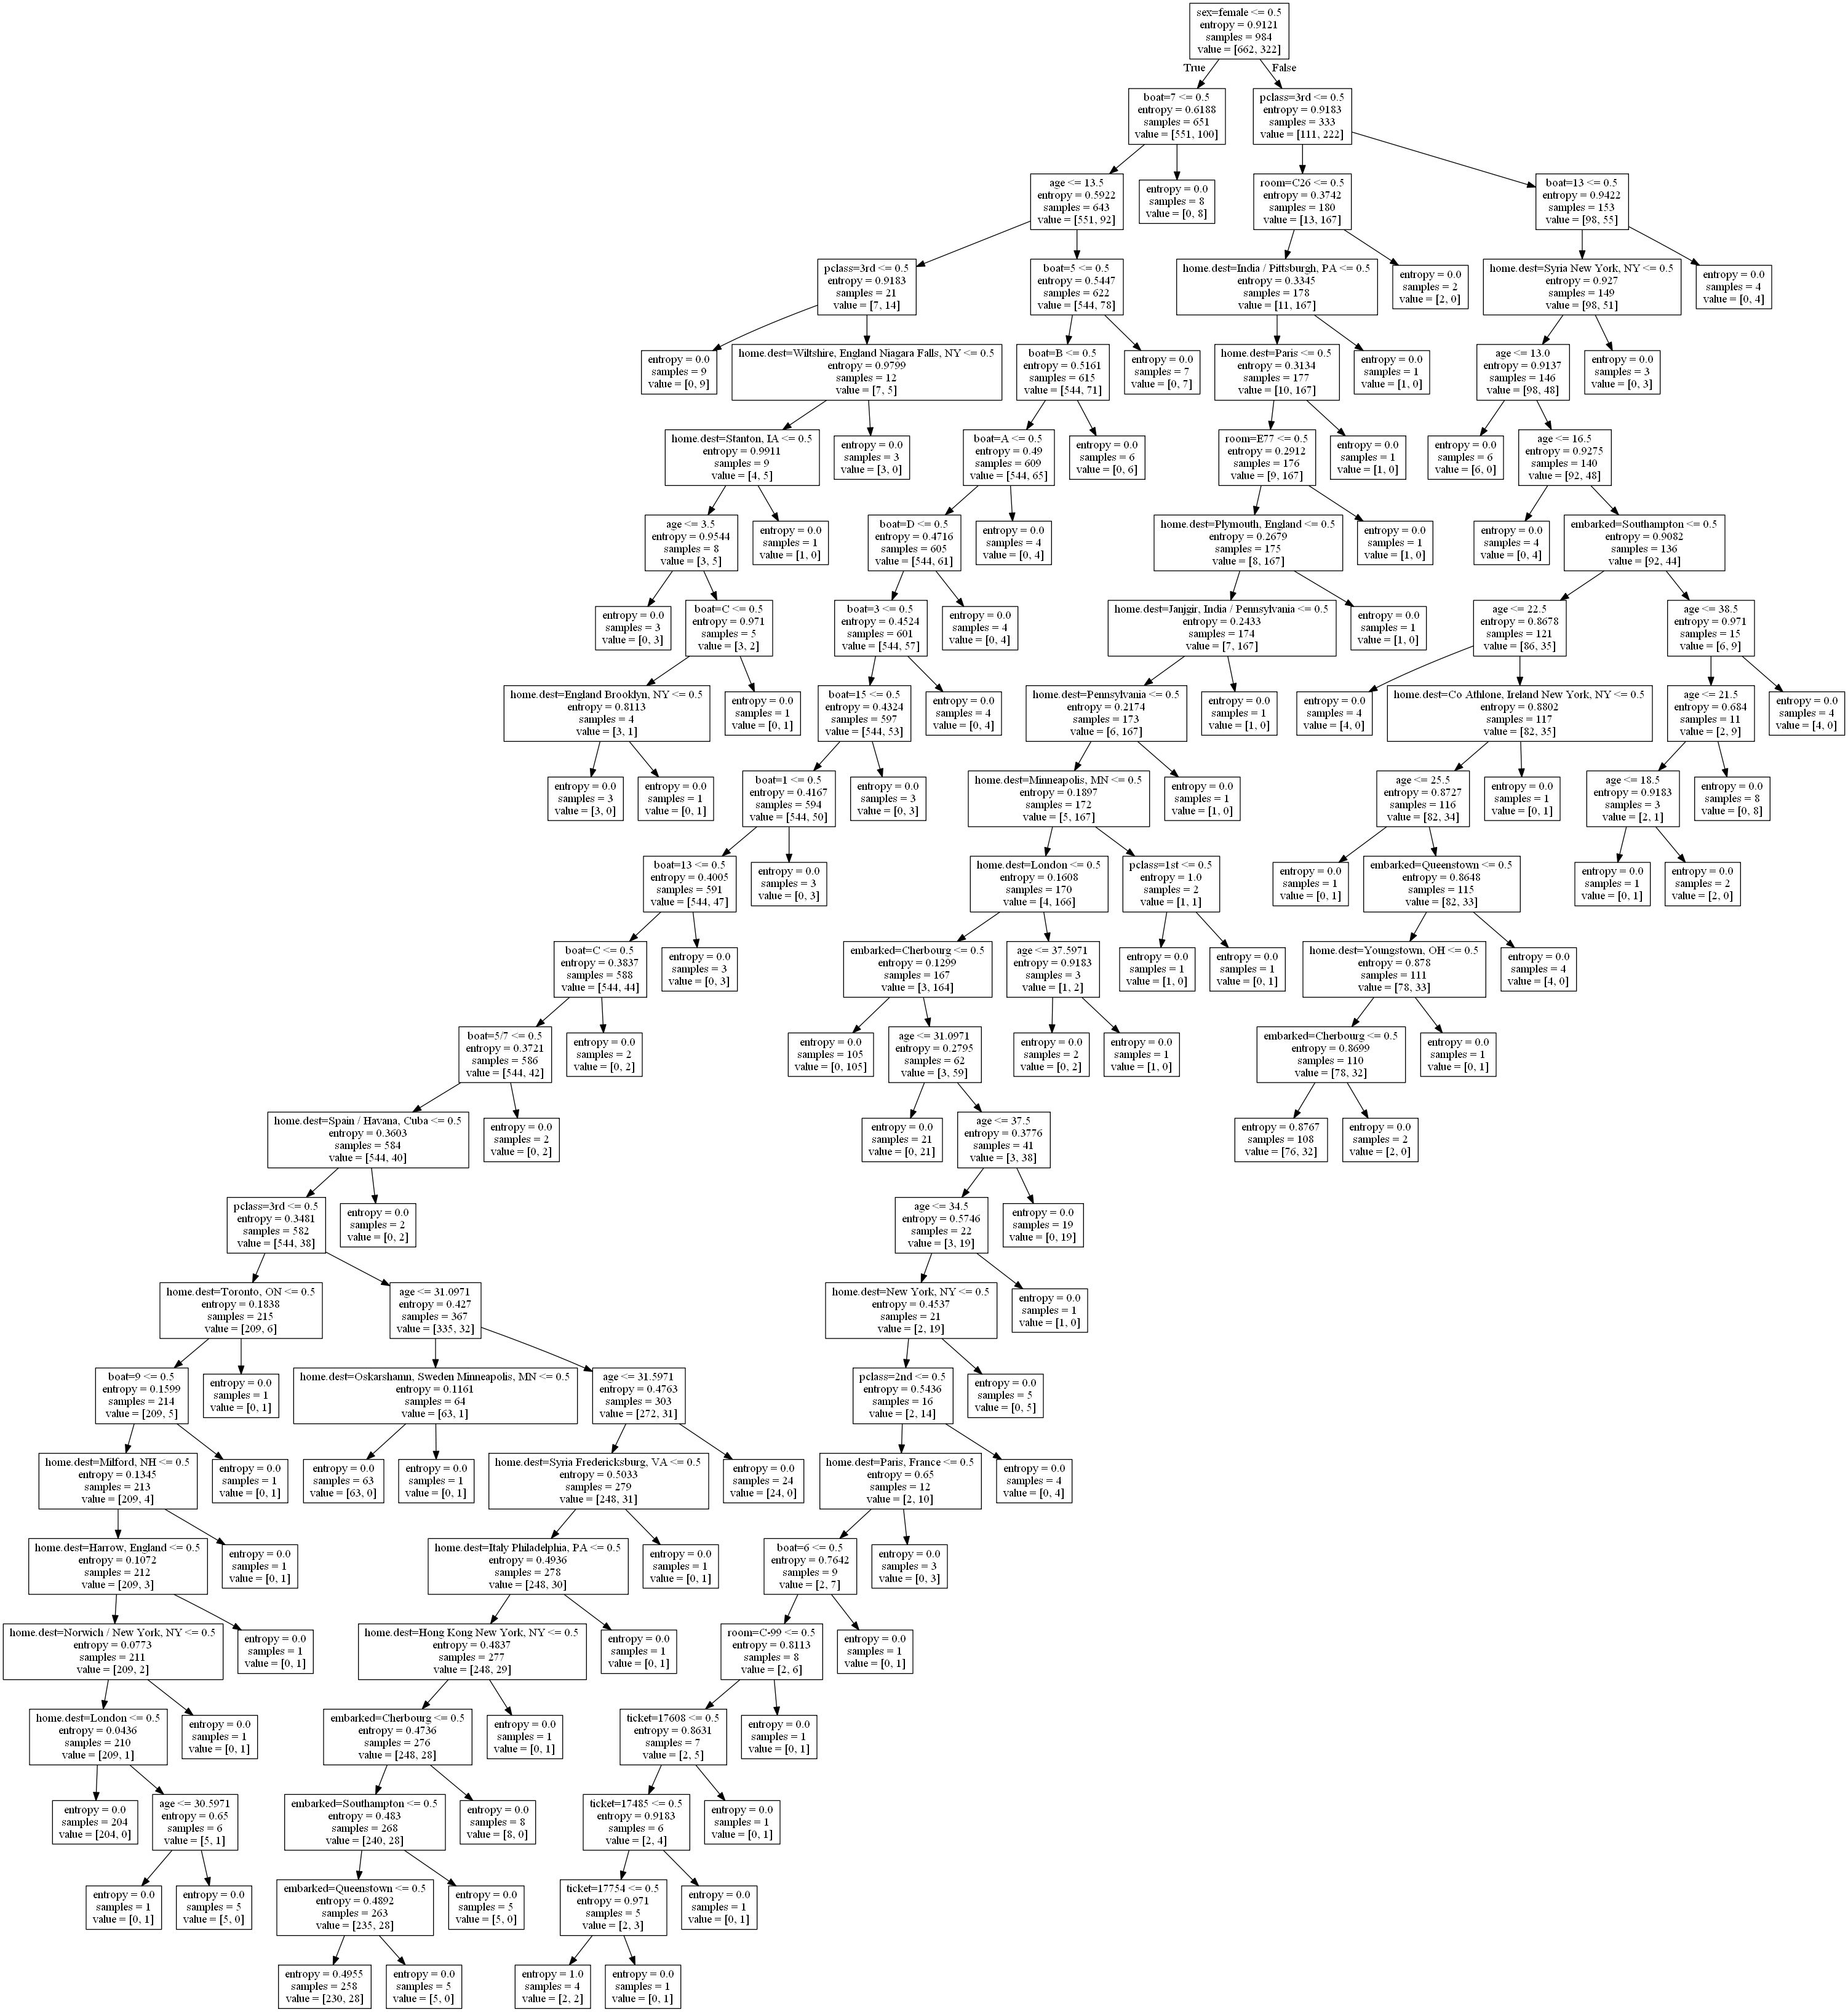

In [123]:
import pydotplus, io
dot_data = io.StringIO()
tree.export_graphviz(dt, out_file=dot_data, feature_names=titanic_data.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic.png')
from IPython.core.display import Image
Image(filename='titanic.png')

In [124]:
from sklearn import metrics
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print( "Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred),"\n")
      
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y, y_pred),"\n")

In [125]:
from sklearn import metrics
measure_performance(X_test, y_test, dt, show_confusion_matrix=False, show_classification_report=False)

Accuracy:0.839 



## Feature Selection

Working with a smaller feature set may lead to better results. So we want to find some way to algorithmically find the best features. This task is called feature selection and is a crucial step when we aim to get decent results with machine learning algorithms. If we have poor features, our algorithm will return poor results no matter how sophisticated our machine learning algorithm is. Select only the 20% most important features, using a chi2 test

In [126]:
from sklearn import feature_selection
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=20)
X_train_fs = fs.fit_transform(X_train, y_train)
print (titanic_data.columns[fs.get_support()])
print (fs.scores_[2])
print (titanic_data.columns[2])


Index(['age', 'embarked=Cherbourg', 'embarked=Southampton', 'pclass=1st',
       'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male', 'boat=1',
       'boat=10',
       ...
       'room=C-125', 'room=C-7', 'room=D-35', 'ticket=111361 L57 19s 7d',
       'ticket=13502 L77', 'ticket=17582 L153 9s 3d',
       'ticket=17608 L262 7s 6d', 'ticket=230136 L39', 'ticket=24160 L221',
       'ticket=392091'],
      dtype='object', length=115)
41.2650346212
embarked=Cherbourg


Evaluate performance with the new feature set

In [127]:
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confusion_matrix=False, show_classification_report=False)

Accuracy:0.842 



Find the best percentil using cross-validation on the training set

[1]
range(1, 100, 5)
Optimal number of features: 6 

Mean scores: [ 0.83332303  0.87907648  0.87602556  0.87196454  0.86891363  0.87195424
  0.86789322  0.87403628  0.87195424  0.87295403  0.86583179  0.87297464
  0.86889301  0.87093383  0.86991342  0.86280148  0.86381159  0.86483199
  0.86382189  0.86178108]


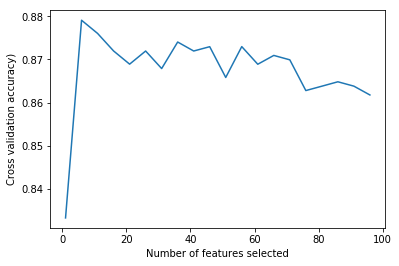

In [128]:
from sklearn import cross_validation

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_validation.cross_val_score(dt, X_train_fs, y_train, cv=5)
    #print i,scores.mean()
    results = np.append(results, scores.mean())

optimal_percentil = np.where(results == results.max())[0]
print(optimal_percentil)
print(percentiles)
#print (percentiles[optimal_percentil[0]])
print ("Optimal number of features:", percentiles[optimal_percentil[0]], "\n")

# Plot number of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation accuracy)")
pl.plot(percentiles,results)
print ("Mean scores:",results)

Evaluate our best number of features on the test set

In [130]:
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=percentiles[optimal_percentil[0]])
X_train_fs = fs.fit_transform(X_train, y_train) #rjm49 - select just the most relevant features, train on those
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confusion_matrix=False, show_classification_report=False)

Accuracy:0.860 



In [131]:
print(dt.get_params())

{'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_split': 1e-07, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


Compute the best criterion, using the held out set (see next notebook on Model Selection)

In [132]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
scores = cross_validation.cross_val_score(dt, X_train_fs, y_train, cv=5)
print( "Entropy criterion accuracy on cv: {0:.3f}".format(scores.mean()))
dt = tree.DecisionTreeClassifier(criterion='gini')
scores = cross_validation.cross_val_score(dt, X_train_fs, y_train, cv=5)
print( "Gini criterion accuracy on cv: {0:.3f}".format(scores.mean()))



Entropy criterion accuracy on cv: 0.879
Gini criterion accuracy on cv: 0.882


In [133]:
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confusion_matrix=False, show_classification_report=False)

Accuracy:0.863 

